# Extraction of memory usage time series
⚠️ **The VPN must be active!**

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
from prometheus_api_client import PrometheusConnect
from prometheus_api_client.utils import parse_datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Extraction
- Query data from Prometheus
- Store a dump of data to the local FS
### Parameters
`k8s_cluster`: Kubernetes cluster's identifier where the Prometheus server runs
- `"prod"`
- `"preprod"`

`workload`: Name of a Kubernetes _statefulset_ or _deployment_ in the selected Kubernetes cluster

In [15]:
# Parameters
k8s_cluster="preprod"
workload="analyzer-worker-data"
range_from=60 # days
range_to=0 # days, 0 = "now"

from prom_usage_service import PromUsageService
prom_service = PromUsageService(cluster=k8s_cluster, workload=workload)
time_series = prom_service.query(start=range_from, end=range_to, metric=PromUsageService.Metrics.MEMORY_MIB)
prom_service.save_cache("./data/mem_usage.json", overwrite=True)

Split extraction into 20 chunks
Remaining chunks to extract: 20
Remaining chunks to extract: 19
Remaining chunks to extract: 18
Remaining chunks to extract: 17
Remaining chunks to extract: 16
Remaining chunks to extract: 15
Remaining chunks to extract: 14
Remaining chunks to extract: 13
Remaining chunks to extract: 12
Remaining chunks to extract: 11
Remaining chunks to extract: 10
Remaining chunks to extract: 9
Remaining chunks to extract: 8
Remaining chunks to extract: 7
Remaining chunks to extract: 6
Remaining chunks to extract: 5
Remaining chunks to extract: 4
Remaining chunks to extract: 3
Remaining chunks to extract: 2
Remaining chunks to extract: 1
Remaining chunks to extract: 0
Saved cached data to:
'/home/flaudarin/Development/monitoring/data/mem_usage.json'


## Deserialization / raw data plot

In [16]:
from stats.stats_service import StatsService
stats_service = StatsService(name="Memory usage")
stats_service.load_time_series(path="data/mem_usage.json")

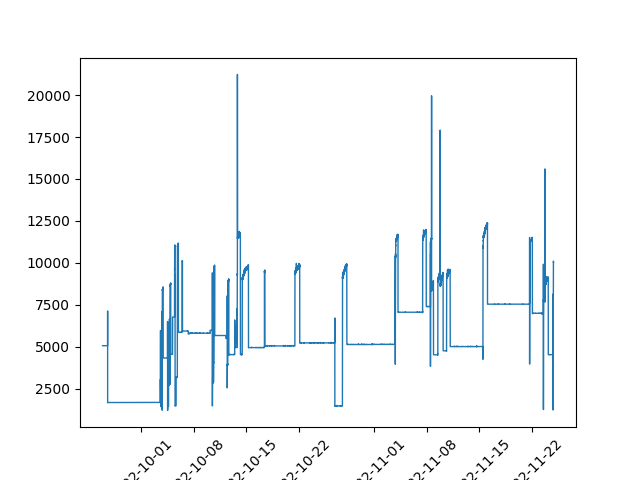

In [17]:
fig, ax = plt.subplots()
ax.plot(stats_service.time_series.time, stats_service.time_series.resource, linewidth=1.0)
plt.xticks(rotation = 45)
plt.show()